Modified from https://github.com/AllenInstitute/MicronsBinder/blob/master/notebooks/intro/ImageAndSegmentationDownload.ipynb

In [1]:
import cloudvolume
import pandas as pd
from imageryclient import ImageryClient
import imageryclient as ic
import matplotlib.pyplot as plt
import numpy as np
import scipy
from PIL import Image
import fastremap
import os
from meshparty import trimesh_io, trimesh_vtk, skeleton, utils
import vtk
import time
from tqdm import tqdm

In [2]:
img65_source = "precomputed://https://bossdb-open-data.s3.amazonaws.com/iarpa_microns/minnie/minnie65/em"
img35_source = "precomputed://https://bossdb-open-data.s3.amazonaws.com/iarpa_microns/minnie/minnie35/em"
seg65_source = "precomputed://gs://iarpa_microns/minnie/minnie65/seg"
seg35_source = "precomputed://gs://iarpa_microns/minnie/minnie35/seg"

In [3]:
img65_cv = cloudvolume.CloudVolume(img65_source, use_https=True)
img35_cv = cloudvolume.CloudVolume(img35_source, use_https=True)

In [4]:
print(img65_cv.bounds)
print(img35_cv.bounds)

Bbox([13824, 13824, 14816],[226816, 194048, 27904], dtype=int32)
Bbox([13824, 13824, 7904],[226816, 194048, 14848], dtype=int32)


# 65 volume visualizer

In [6]:
cellid_65 = [864691134964446239] # astrocyte in 65 volume, surrounds pyr neuron 864691135293126156

In [7]:
# set desired image size

image_size = 500
half_image_size = image_size/2

In [8]:
# enter coordinates from Neuroglancer; make x and y the same, changing only the z-position

bottom_position = [172695, 135328, 20845]
top_position = [172695, 135328, 21072]

zslices = top_position[2] - bottom_position[2]
mid_slice =  int(zslices/2)
mid_position = [bottom_position[0], bottom_position[1], bottom_position[2]+mid_slice]

print(f'Slices:',zslices)
print(f'Mid slice:', mid_slice)
print(f'Mid position:', mid_position)

Slices: 227
Mid slice: 113
Mid position: [172695, 135328, 20958]


In [9]:
position_x = mid_position[0]
position_y = mid_position[1]
position_z = mid_position[2]

position_x_min = int(position_x - half_image_size)
position_x_max = int(position_x + half_image_size)
position_y_min = int(position_y - half_image_size)
position_y_max = int(position_y + half_image_size)
position_z_max = position_z + 1

In [10]:
print(position_x_min, position_x_max)
print(position_y_min, position_y_max)
print(position_z, position_z_max)

172445 172945
135078 135578
20958 20959


In [11]:
# img = img65_cv[position_x_min:position_x_max, position_y_min:position_y_max, position_z]

img = img65_cv[position_x_min:position_x_max, position_y_min:position_y_max, position_z]

Decompressing: 100%|██████████| 25/25 [00:00<00:00, 1058.64it/s]


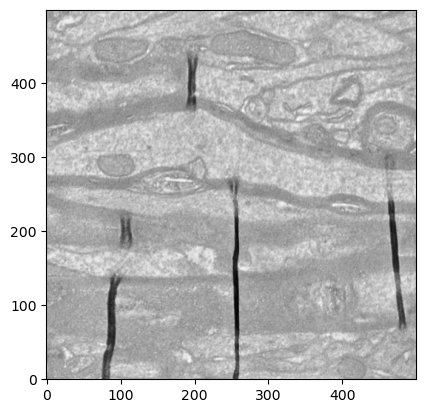

In [12]:
# show image from bottom position
# from: https://stackoverflow.com/questions/31401812/matplotlib-rotate-image-file-by-x-degrees
tr = scipy.ndimage.rotate(img, 90)
plt.imshow(np.squeeze(tr), cmap=plt.cm.gray, origin='lower')
#plt.gca().invert_yaxis()

In [19]:
img_width = 500

In [20]:
img_client = ic.ImageryClient(image_source=img65_source, segmentation_source=seg65_source)

In [21]:
ctr = mid_position
image = img_client.image_cutout(ctr, bbox_size=(img_width, img_width))

In [22]:
image

array([[128, 129, 130, ..., 127, 122, 126],
       [129, 129, 131, ..., 119, 117, 126],
       [132, 132, 133, ..., 121, 115, 120],
       ...,
       [136, 139, 137, ..., 127, 133, 131],
       [137, 138, 139, ..., 127, 124, 132],
       [141, 139, 137, ..., 126, 125, 122]], dtype=uint8)

In [23]:
bounds = ic.bounds_from_center(ctr, width=img_width, height=img_width, depth=1)

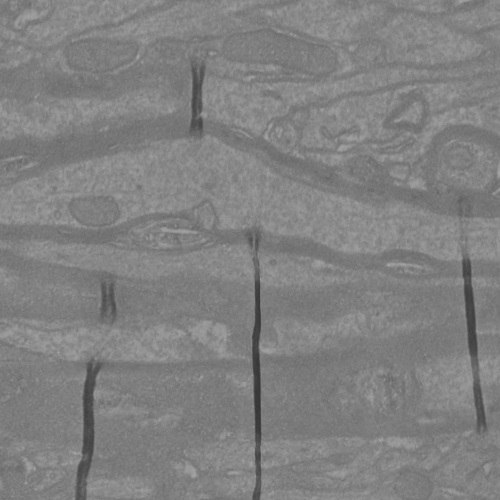

In [24]:
image = img_client.image_cutout(bounds)

# Use PIL to visualize
Image.fromarray(image.T)

In [25]:
mid_position

[172695, 135328, 20958]

## Screenshot from Neuroglancer (that is, what the image should look like)

https://github.com/shandran/minnie-volume/blob/main/notebooks/debug/864691134964446239_neuroglancer.png